# Tolls Pendukung

In [1]:
#==============| distribusi data |=================
def count_norm(df_counta):
    df_count=df_counta.copy()
    tampung_itu=[]
    for j in range(len(df_count)):
        tampun_ini=[]
        ini_inc=1
        for i in range(1,5):
            #print(j,i)
            
            ini=df_count[df_count.columns[i]].iloc[j]
            if ini=='True':
                tampun_ini.append(ini_inc)
                ini_inc=ini_inc+1
            else:
                tampun_ini.append(0)
                
        tampung_itu.append(np.max(tampun_ini))
        
    #print(tampung_itu)
                
            
        
    df_count['banyak']=tampung_itu
    #print(df_count)
    return  df_count

def ubah_notasi_ilmiah(value):
    formatted_value = "{:.4f}".format(value) if isinstance(value, float) else value
    return formatted_value
    
# Definisikan fungsi untuk mengubah notasi ilmiah
def ubah_notasi_ilmiah2(value):
    formatted_value = "{:.2f}".format(value) if isinstance(value, float) else value
    return formatted_value

def data_normal(data,dftt,ii,p_valls):
    statshapiro, p_valueshapiro = shapiro(data)
    statnormaltest, p_valuenormaltest = normaltest(data)
    statkstes, p_valuekstes = kstest(data, 'norm')
    sta_jb,p_jb =jarque_bera(data)


    sh=  str(p_valueshapiro>p_valls)
    norm=str(p_valuenormaltest>p_valls)
    kst=str(p_valuekstes>p_valls)
    Pjb=str(p_jb>p_valls)




    sshapiro='shapiro'
    snormaltes='normaltes'
    skstest='kstest'
    spjb='jarque_bera'


    enter='\n'
    Statisticw= 'Statistic'
    P_valuew='P-valuew'
    nor='normal: '
    samadengan=' : '
    jeda='   '


    statshapiro=ubah_notasi_ilmiah(statshapiro)
    p_valueshapiro=ubah_notasi_ilmiah(p_valueshapiro)
    statnormaltest=ubah_notasi_ilmiah(statnormaltest)
    p_valuenormaltest =ubah_notasi_ilmiah( p_valuenormaltest )
    statkstes=ubah_notasi_ilmiah(statkstes)
    p_valuekstes=ubah_notasi_ilmiah(p_valuekstes)
    sta_jb=ubah_notasi_ilmiah(sta_jb)
    p_jb=ubah_notasi_ilmiah(p_jb)

    midd=sshapiro+jeda+nor+sh+enter+Statisticw+samadengan+statshapiro+jeda+P_valuew+samadengan+p_valueshapiro
    midd1=snormaltes+jeda+nor+ norm+enter+Statisticw+samadengan+ statnormaltest+jeda+P_valuew+samadengan+p_valuenormaltest
    midd2=skstest+jeda+nor+ kst+enter+Statisticw+samadengan+ statkstes+jeda+P_valuew+samadengan+ p_valuekstes
    midd3=spjb+jeda+nor+ Pjb+enter+Statisticw+samadengan+ sta_jb+jeda+P_valuew+samadengan+ p_jb



    f=dftt.columns[ii]
    rang=[f,sh,statshapiro,p_valueshapiro, norm,statnormaltest,p_valuenormaltest  ,kst,statkstes,p_valuekstes,Pjb,sta_jb,p_jb]


    return midd,midd1,midd2,midd3,rang







def visual_norm(dft, show_plot,p_vall, dpi):


    panjang = len(dft.columns)
    if panjang==1:
        dft=dft['salinan']=dft
        panjang=2


    if show_plot==True:
        # CATATAN! Ini mengembalikan array 2 dimensi dari subplot
        fig, axes = plt.subplots(nrows=panjang, ncols=3, figsize=(30, panjang * 10), dpi= dpi)
        #fig.text(0.5, 0.95, 'analisis distribusi normal', ha='center', va='center', fontsize=60, color='black')
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.8)

        axes[0, 0].text(-.4, 1.5,'o', ha='center', va='center', transform=axes[0, 0].transAxes, fontsize=1,
                                color='blue')
        axes[panjang-1, 2].text(1.3, -.4,'o', ha='center', va='center', transform=axes[panjang-1, 2].transAxes, fontsize=1,
                                color='blue')
    rangkuman = []
    for i in range(panjang):
        data = dft[dft.columns[i]]
        data_hasil = data_normal(data, dft, i,p_vall)
        rangkuman.append(data_hasil[4])

        # visualisasi
        if show_plot==True:
            
      


            # Boxplot
            sns.boxplot(x=data, ax=axes[i, 0])
            axes[i, 0].tick_params(axis='x', labelsize=25)
            axes[i, 0].tick_params(axis='y', labelsize=25)
            axes[i, 0].set_xlabel(dft.columns[i], fontsize=30)
             # Atur ukuran xtick

            # Q-Q plot
            sm.qqplot(data, line='s', ax=axes[i, 1])
            axes[i, 1].tick_params(axis='x', labelsize=25)
            axes[i, 1].tick_params(axis='y', labelsize=25) 
            axes[i, 1].set_xlabel('Theoretical Quantiles', fontsize=30)
            axes[i, 1].set_ylabel('Sample Quantiles', fontsize=30)  # Atur ukuran xtick

            # Histogram
            sns.histplot(data, kde=True, ax=axes[i, 2])
            axes[i, 2].tick_params(axis='x', labelsize=25)
            axes[i, 2].tick_params(axis='y', labelsize=25)
            axes[i, 2].set_xlabel(dft.columns[i], fontsize=30)
            axes[i, 2].set_ylabel('Count', fontsize=30) 



            # Add text annotation for the third subplot left
            
            axes[i, 0].text(0.5, 1.12, data_hasil[2], ha='center', va='center', transform=axes[i, 0].transAxes, fontsize=25,
                            color='blue')
            axes[i, 0].text(0.5, 1.23, '-------------------------------------------------------------------', ha='center', va='center', transform=axes[i, 0].transAxes, fontsize=20,
                            color='red')
            axes[i, 0].text(0.5, 1.33, data_hasil[0],
                           ha='center', va='center', transform=axes[i, 0].transAxes, fontsize=25,
                           color='blue')

            # Add text annotation for the third subplot mid
            axes[i, 1].text(0.5, 1.23, dft.columns[i], ha='center', va='center', transform=axes[i, 1].transAxes, fontsize=80,
                            color='red')






            # Add text annotation for the third subplot right
            axes[i, 2].text(0.5, 1.33, data_hasil[1], ha='center', va='center', transform=axes[i, 2].transAxes, fontsize=25,
                            color='blue')
            axes[i, 2].text(0.5, 1.12, data_hasil[3], ha='center', va='center', transform=axes[i, 2].transAxes, fontsize=25,
                            color='blue')
            axes[i, 2].text(0.5, 1.23, '-------------------------------------------------------------------', ha='center', va='center', transform=axes[i, 2].transAxes, fontsize=20,
                            color='red')


    hh = pd.DataFrame(rangkuman)
    hh.applymap(ubah_notasi_ilmiah)
    hh.columns = ['Columns', 'Shapiro','Stat_shapiro','P_value_shapiro', 'Normaltes', 'Stat_Normaltes','P_value_Normaltes',
                  'Kstest','Stat_Kstest','P_value_Kstest','Jarque_bera','Stat_Jarque_bera','P_value_Jarque_bera']



    
    df_count=count_norm(hh[['Columns','Shapiro','Normaltes','Kstest','Jarque_bera']])     
    yang_dipakai=df_count[df_count['banyak']>1]['Columns']
    

    if show_plot==True:
      return hh, fig, axes,df_count,yang_dipakai

    else:
      return hh,0,0,df_count,yang_dipakai




#==============| num kat |=================

def anova_t_tidak_normal_num(xx,yy,full_data,p_vall):
    panjang_x=len(yy.columns)
    dataaaa=[]

    
    dat=full_data[xx].describe().iloc[1]
    #print(dat)
    for i in range(panjang_x):

        
        
        #print('\n\n')
        if dat<2:
              print(dat,full_data[xx],'data mono')
                
                
                
        if dat ==2:
            #print(dat,xx.columns[i],'t')
            #print(full_data[[yy,xx.columns[i]]].head())
            data_s=full_data[xx]
            #print(data_s.unique())
            #print(data_s)
            unique_values = data_s.unique()
            #print([unique_values[0]])
            data_s_1 = full_data[full_data[xx] == unique_values[0]][yy.columns[i]]
            data_s_2 = full_data[full_data[xx] == unique_values[1]][yy.columns[i]]


            ## now for the test

            t, p  = stats.mannwhitneyu(data_s_1, data_s_2)





            # Outputting results

            #print(xx.columns[i])
            #print('t({}) = {}, p = {}'.format(df, t, p))

            # Conducting hypothesis testing
            if p > p_vall:
                pakai='tidak'
                nilai='Accept null hypothesis'
                #print('Accept null hypothesis')
            else:
                nilai='Reject null hypothesis'
                #print('Reject null hypothesis')
                pakai='iya'
            kesimp=[yy.columns[i],dat,'mannwhitneyu',ubah_notasi_ilmiah(p),nilai,pakai]
            dataaaa.append(kesimp)
            
            
            
            

        else:
            data_s=full_data[xx]
            unique_values = data_s.unique()

            #print(dat,xx.columns[i],'anova',unique_values)
            #print(full_data[[yy,xx.columns[i]]].head())
            data_ss=full_data[[xx,yy.columns[i]]]
            pp = kruskal(data=data_ss,dv=yy.columns[i],between=xx)
            p=pp['p-unc'].iloc[0]




            if p >p_vall:
                nilai='Accept null hypothesis'
                pakai='tidak'
                #print('Accept null hypothesis')
                #print(p)
            else:
                nilai='Reject null hypothesis'
                pakai='iya'
                #print('Reject null hypothesis')
                #print(p)

            kesimp=[yy.columns[i],dat,'kruskal',ubah_notasi_ilmiah(p),nilai,pakai]
            dataaaa.append(kesimp)

    dataaaa=pd.DataFrame(dataaaa)
    dataaaa.columns=['nama','unik','testnya','p value','hasil hipotesis','kesimpulan']
    return dataaaa


def anova_t_normal_num(xx,yy,full_data,p_vall):
    
    print(xx)
    panjang_x=len(yy.columns)
    dataaaa=[]
    
    dat=full_data[xx].describe().iloc[1]
    for i in range(panjang_x):

        
        
        

        #print('\n\n')
        if dat<2:
            print(dat,xx.columns[i],'data mono')
            
            
            
        if dat ==2:
            #print(dat,xx.columns[i],'t')
            #print(full_data[[yy,xx.columns[i]]].head())
            data_s=full_data[xx]
            #print(data_s)
            unique_values = data_s.unique()

            data_s_1 = full_data[full_data[xx] == unique_values[0]][yy.columns[i]]
            data_s_2 = full_data[full_data[xx] == unique_values[1]][yy.columns[i]]
            #print(data_s_1)
            #print(data_s_2)


            # Performing the t-test
            t, p = stats.ttest_ind(data_s_1, data_s_2, equal_var=True)

            # Calculating the degrees of freedom
            df = len(data_s_1) + len(data_s_2) - 2

            # Outputting results

            #print(xx.columns[i])
            #print('t({}) = {}, p = {}'.format(df, t, p))

            # Conducting hypothesis testing
            if p > p_vall:
                nilai='Accept null hypothesis'
                pakai='tidak'
                #print('Accept null hypothesis')
            else:
                nilai='Reject null hypothesis'
                pakai='iya'
                #print('Reject null hypothesis')
            kesimp=[yy.columns[i],dat,'t test',ubah_notasi_ilmiah(p),nilai,pakai]
            dataaaa.append(kesimp)
            
            
            
        else:
            data_s=full_data[xx]
            unique_values = data_s.unique()

            #print(dat,xx.columns[i],'anova',unique_values)
            #print(full_data[[yy,xx.columns[i]]].head())
            data_ss=full_data[[xx,yy.columns[i]]]

            pp=pg.anova(data=data_ss,dv=yy.columns[i],between=xx)
            p=pp['p-unc'].iloc[0]




            if p > p_vall:
                nilai='Accept null hypothesis'
                pakai='tidak'
                #print('Accept null hypothesis')
                #print(p)
            else:
                nilai='Reject null hypothesis'
                pakai='iya'
                #print('Reject null hypothesis')
                #print(p)

                kesimp=[yy.columns[i],dat,'anova',ubah_notasi_ilmiah(p),nilai,pakai]
                dataaaa.append(kesimp)

    dataaaa=pd.DataFrame(dataaaa)
    dataaaa.columns=['nama','unik','testnya','p value','hasil hipotesis','kesimpulan']
    return dataaaa
#-----------| kat num |---------------------
def ubah_notasi_ilmiah(value):
    formatted_value = "{:.4f}".format(value) if isinstance(value, float) else value
    return formatted_value
def anova_t_tidak_normal(xx,yy,full_data,p_vall):
    panjang_x=len(xx.columns)
    dataaaa=[]

    for i in range(panjang_x):

        dat=xx.describe().iloc[1][i]

        #print('\n\n')
        if dat<2:
              print(dat,xx.columns[i],'data mono')
        if dat ==2:
            #print(dat,xx.columns[i],'t')
            #print(full_data[[yy,xx.columns[i]]].head())
            data_s=full_data[[xx.columns[i]]]
            #print(data_s)
            unique_values = data_s.apply(lambda x: x.unique())

            data_s_1=full_data[full_data[xx.columns[i]]==unique_values.iloc[0][0]][yy]
            data_s_2=full_data[full_data[xx.columns[i]]==unique_values.iloc[1][0]][yy]
            #print(data_s_1)
            #print(data_s_2)


            ## now for the test

            t, p  = stats.mannwhitneyu(data_s_1, data_s_2)





            # Outputting results

            #print(xx.columns[i])
            #print('t({}) = {}, p = {}'.format(df, t, p))

            # Conducting hypothesis testing
            if p > p_vall:
                pakai='tidak'
                nilai='Accept null hypothesis'
                #print('Accept null hypothesis')
            else:
                nilai='Reject null hypothesis'
                #print('Reject null hypothesis')
                pakai='iya'
            kesimp=[xx.columns[i],dat,'mannwhitneyu',ubah_notasi_ilmiah(p),nilai,pakai]
            dataaaa.append(kesimp)
        else:
            data_s=full_data[[xx.columns[i]]]
            unique_values = data_s.apply(lambda x: x.unique())
            #print(i,'\n\n',data_s,unique_values)

            #print(dat,xx.columns[i],'anova',unique_values)
            #print(full_data[[yy,xx.columns[i]]].head())
            data_ss=full_data[[xx.columns[i],yy]]
            #print(data_ss)
            pp = kruskal(data=data_ss,dv=yy,between=xx.columns[i])
            p=pp['p-unc'].iloc[0]




            if p >p_vall:
                nilai='Accept null hypothesis'
                pakai='tidak'
                #print('Accept null hypothesis')
                #print(p)
            else:
                nilai='Reject null hypothesis'
                pakai='iya'
                #print('Reject null hypothesis')
                #print(p)

            kesimp=[xx.columns[i],dat,'kruskal',ubah_notasi_ilmiah(p),nilai,pakai]
            dataaaa.append(kesimp)

    dataaaa=pd.DataFrame(dataaaa)
    dataaaa.columns=['nama','unik','testnya','p value','hasil hipotesis','kesimpulan']
    return dataaaa
def anova_t_normal(xx,yy,full_data,p_vall):
    panjang_x=len(xx.columns)
    dataaaa=[]

    for i in range(panjang_x):

        dat=xx.describe().iloc[1][i]

        #print('\n\n')
        if dat<2:
            print(dat,xx.columns[i],'data mono')
        if dat ==2:
            #print(dat,xx.columns[i],'t')
            #print(full_data[[yy,xx.columns[i]]].head())
            data_s=full_data[[xx.columns[i]]]
            #print(data_s)
            unique_values = data_s.apply(lambda x: x.unique())

            data_s_1=full_data[full_data[xx.columns[i]]==unique_values.iloc[0][0]][yy]
            data_s_2=full_data[full_data[xx.columns[i]]==unique_values.iloc[1][0]][yy]
            #print(data_s_1)
            #print(data_s_2)


            # Performing the t-test
            t, p = stats.ttest_ind(data_s_1, data_s_2, equal_var=True)

            # Calculating the degrees of freedom
            df = len(data_s_1) + len(data_s_2) - 2

            # Outputting results

            #print(xx.columns[i])
            #print('t({}) = {}, p = {}'.format(df, t, p))

            # Conducting hypothesis testing
            if p > p_vall:
                nilai='Accept null hypothesis'
                pakai='tidak'
                #print('Accept null hypothesis')
            else:
                nilai='Reject null hypothesis'
                pakai='iya'
                #print('Reject null hypothesis')
            kesimp=[xx.columns[i],dat,'t test',ubah_notasi_ilmiah(p),nilai,pakai]
            dataaaa.append(kesimp)
        else:
            data_s=full_data[[xx.columns[i]]]
            unique_values = data_s.apply(lambda x: x.unique())

            #print(dat,xx.columns[i],'anova',unique_values)
            #print(full_data[[yy,xx.columns[i]]].head())
            data_ss=full_data[[xx.columns[i],yy]]

            pp=pg.anova(data=data_ss,dv=yy,between=xx.columns[i])
            p=pp['p-unc'].iloc[0]




            if p > p_vall:
                nilai='Accept null hypothesis'
                pakai='tidak'
                #print('Accept null hypothesis')
                #print(p)
            else:
                nilai='Reject null hypothesis'
                pakai='iya'
                #print('Reject null hypothesis')
                #print(p)

            kesimp=[xx.columns[i],dat,'anova',ubah_notasi_ilmiah(p),nilai,pakai]
            dataaaa.append(kesimp)

    dataaaa=pd.DataFrame(dataaaa)
    dataaaa.columns=['nama','unik','testnya','p value','hasil hipotesis','kesimpulan']
    return dataaaa





In [2]:
#-----------| box |---------------------
def box_num_kat(df,df_nums,target):
    for i in df_nums.columns:
        plt.figure(figsize=(10,4))
        sns.boxplot(data=df,y=i,x=target,hue=target)
        plt.show()
        
def box_kat_num(df,df_objs,target):
    for i in df_objs.columns:
        plt.figure(figsize=(10,4))
        sns.boxplot(data=df,x=i,y=target,hue=i)
        plt.show()
        
#--------------| kat vs kat| ----------
def chi_fizz(df_objs,target,data):
    hasil_hitung=[]
    #print(len(df_objs.columns))
    for ik in range(len(df_objs.columns)):
        
        data_tab=pd.crosstab(data[df_objs.columns[ik]],data[target])
          # Data tabel kontingensi (gantilah ini dengan data aktual Anda)

          # Hitung uji chi-square
        statistic, p_value, dof, expected = chi2_contingency(data_tab)
           #print(dof)



          # Periksa kriteria untuk menggunakan uji Fisher's exact
        fizz = False
        chi22=True
        kurang_dari5='5<tidak ada'
        berapa=0
        if dof == 1 and np.any(expected < 5):
            fizz = True




        for i in range(len(expected)):
              for j in range(len(expected[i])):
                  #print(expected[i][j])
                  if expected[i][j] <5:
                    #print('lllllll')
                    kurang_dari5='5< ada'
                    berapa=berapa+1

        kotak_1=1/(len(expected)*len(expected[0]))

        if kotak_1*berapa>0.2:
            chi22=False



          # Tampilkan hasil
          #print("\nChi-Square Test:")
          #print("Chi-Square Statistic:", statistic)
          #print("P-value:", p_value)
          #print("Degrees of Freedom:", dof)
          #print("Expected Values:\n", expected)

          #print('\nIsi data cocok untuk uji Fisher:', fizz)
        fisher_statistic=-99
        fisher_p_value=-99
          # Cek apakah ukuran tabel adalah 2x2 untuk menggunakan uji Fisher's exact
           #print(fizz ,dof)
        if fizz and dof==1:
            chi22=False
            fisher_statistic, fisher_p_value = fisher_exact(data_tab)
            print("Fisher's Exact Test Statistic:", fisher_statistic)
            print("Fisher's Exact Test P-value:", fisher_p_value)

        bb=len(expected)
        rr=len(expected[0])
          #print(rr,bb)
        min_dim = min(bb- 1, rr- 1)

          #print(data_tab)
        n = np.sum(data_tab.values)
          #print(n)
        phi2 = statistic  / n
          #chermer
        ll= np.sqrt(statistic / (n *min_dim))
          #print('cramer',ll,'\n\n\n')
            

        hasil_hitung.append([target,df_objs.columns[ik],'chi2',chi22,statistic,ubah_notasi_ilmiah(p_value), dof,data_tab.shape,n,kurang_dari5,berapa,'cramer',ll,phi2,'fizher',fizz,fisher_statistic, fisher_p_value])

    hasil=pd.DataFrame(hasil_hitung)
    hasil.columns=['target','kolom','uji1','cocok','Statistic','P-value','ddof','ukuran','jumlah data','ada yg kurang','berapa','uji2','hasill','phi','uji3','cocok','fz_statistic','fz_p_value']
    return hasil

def simple_kat(df_objs):
    temp = []
    for i in df_objs.columns:
        unique_values = ', '.join(df_objs[i].unique())
        temp.append([i, len(df_objs[i].unique()), unique_values])

    result_df = pd.DataFrame(temp, columns=['Column', 'Unique Count', 'Unique Values'])
    return result_df

In [3]:

def iqr(target,df):
    Q1 = df[target].quantile(0.25)
    Q3 = df[target].quantile(0.75)
    #print('Q1, Q3')
    #print(Q1, Q3)
    IQR = Q3 - Q1
    #print('\nIQR')
    #print(IQR)
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    #print('\nlower_limit, upper_limit')
    #print(lower_limit, upper_limit)
    iqr=df[(df[target]<lower_limit)|(df[target]>upper_limit)]
    return (iqr.index)
    
def z_score(target,df):
    upper_limitz = df[target].mean() + 3*df[target].std()
    lower_limitz = df[target].mean() -3*df[target].std()
    #print('lower_limit,upper_limit')
    #print(lower_limitz,upper_limitz)
    z_score=df[(df[target]>upper_limitz) | (df[target]<lower_limitz)]
    return  (z_score.index)

def persen(target,df):   
    min_thresold, max_thresold = df[target].quantile([0.001, 0.999])
    min_thresold, max_thresold
    persen=df[(df[target]>max_thresold) | (df[target]<min_thresold)]
    return (persen.index)


def cari_out(df_nums,df):
    temp_out=[]
    p=0
    for i in df_nums.columns:
        target=i
        a=iqr(target,df)
        b=z_score(target,df)
        c=persen(target,df)

        if  len(a)>0 and  len(b)>0 and  len(c)>0:
            intersection = a.intersection(b).intersection(c)
            data = intersection.tolist()
            print(f"{p} {i}\t:", data)
        else:
            data=[]
            print(f"{p} {i}\t: {data}")
        temp_out.append(data)
        p=p+1
    return temp_out

In [33]:
from sklearn.feature_selection import mutual_info_regression
def cari_cor_tabrak(df_caris,y_trains,cari):
    
    df_cari=df_caris.copy()
    ketemu=[]
    

    # determine the mutual information
    mutual_info = mutual_info_regression(df_cari, y_trains)
    mutual_info

    mutual_info = pd.Series(mutual_info)
    mutual_info.index = df_cari.columns
    mutual_info.sort_values(ascending=False)
    


    for i in range(1,len(df_cari.columns)+1):
        for j in range(i):
            #print(i-1,j)
            if i-1!=j:
                hasil=df_cari[[df_cari.columns[i-1],df_cari.columns[j]]].corr().iloc[0][1]

                if hasil>cari:
                    h1=df_cari[df_cari.columns[i-1]].var(ddof=0)
                    h2=df_cari[df_cari.columns[j]].var(ddof=0)
                    c1=pd.concat([df_cari[[df_cari.columns[i-1]]],y_trains],axis=1).corr().iloc[0][1]
                    c2=pd.concat([df_cari[[df_cari.columns[j]]],y_trains],axis=1).corr().iloc[0][1]
                    #print(hasil,df_cari.columns[i-1],h1,c1,df_cari.columns[j],h2,c2)
                    ketemu.append([df_cari.columns[i-1]+' <-> '+df_cari.columns[2-1],hasil,df_cari.columns[i-1],h1,c1,df_cari.columns[j],h2,c2])
    if len(ketemu)==0:
        
        return 'tidak ada tabrakan'
    else:
        print(mutual_info)
        return pd.DataFrame(ketemu,columns=['corelasi ant','adalah','kolom1','variansi1','cor1 y','kolom2','variansi2','cor2 y'])


# Import Library

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from scipy.stats import shapiro,normaltest,kstest,jarque_bera
import pingouin as pg
from pingouin import kruskal
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import chi2_contingency, fisher_exact

# load data dan cek data

In [19]:
df = pd.read_csv('data/data_csv/cement_slump.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [21]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.038738
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.837120
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


In [22]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

Series([], dtype: int64)

# split data numerik kategorik

In [23]:
df_nums=df.select_dtypes(exclude='O')
df_objs=df.select_dtypes(include='O')
len(df_nums.columns),len(df_objs.columns)

(10, 0)

# data numerik

## outlier

In [24]:
lists=cari_out(df_nums,df)

0 Cement	: []
1 Slag	: []
2 Fly ash	: []
3 Water	: []
4 SP	: [3]
5 Coarse Aggr.	: []
6 Fine Aggr.	: []
7 SLUMP(cm)	: []
8 FLOW(cm)	: []
9 Compressive Strength (28-day)(Mpa)	: []


In [25]:
merged_list = list(set().union(*lists))


In [26]:
df=df.drop(merged_list)
df_nums=df.select_dtypes(exclude='O')
df_objs=df.select_dtypes(include='O')


## cek distribusi 

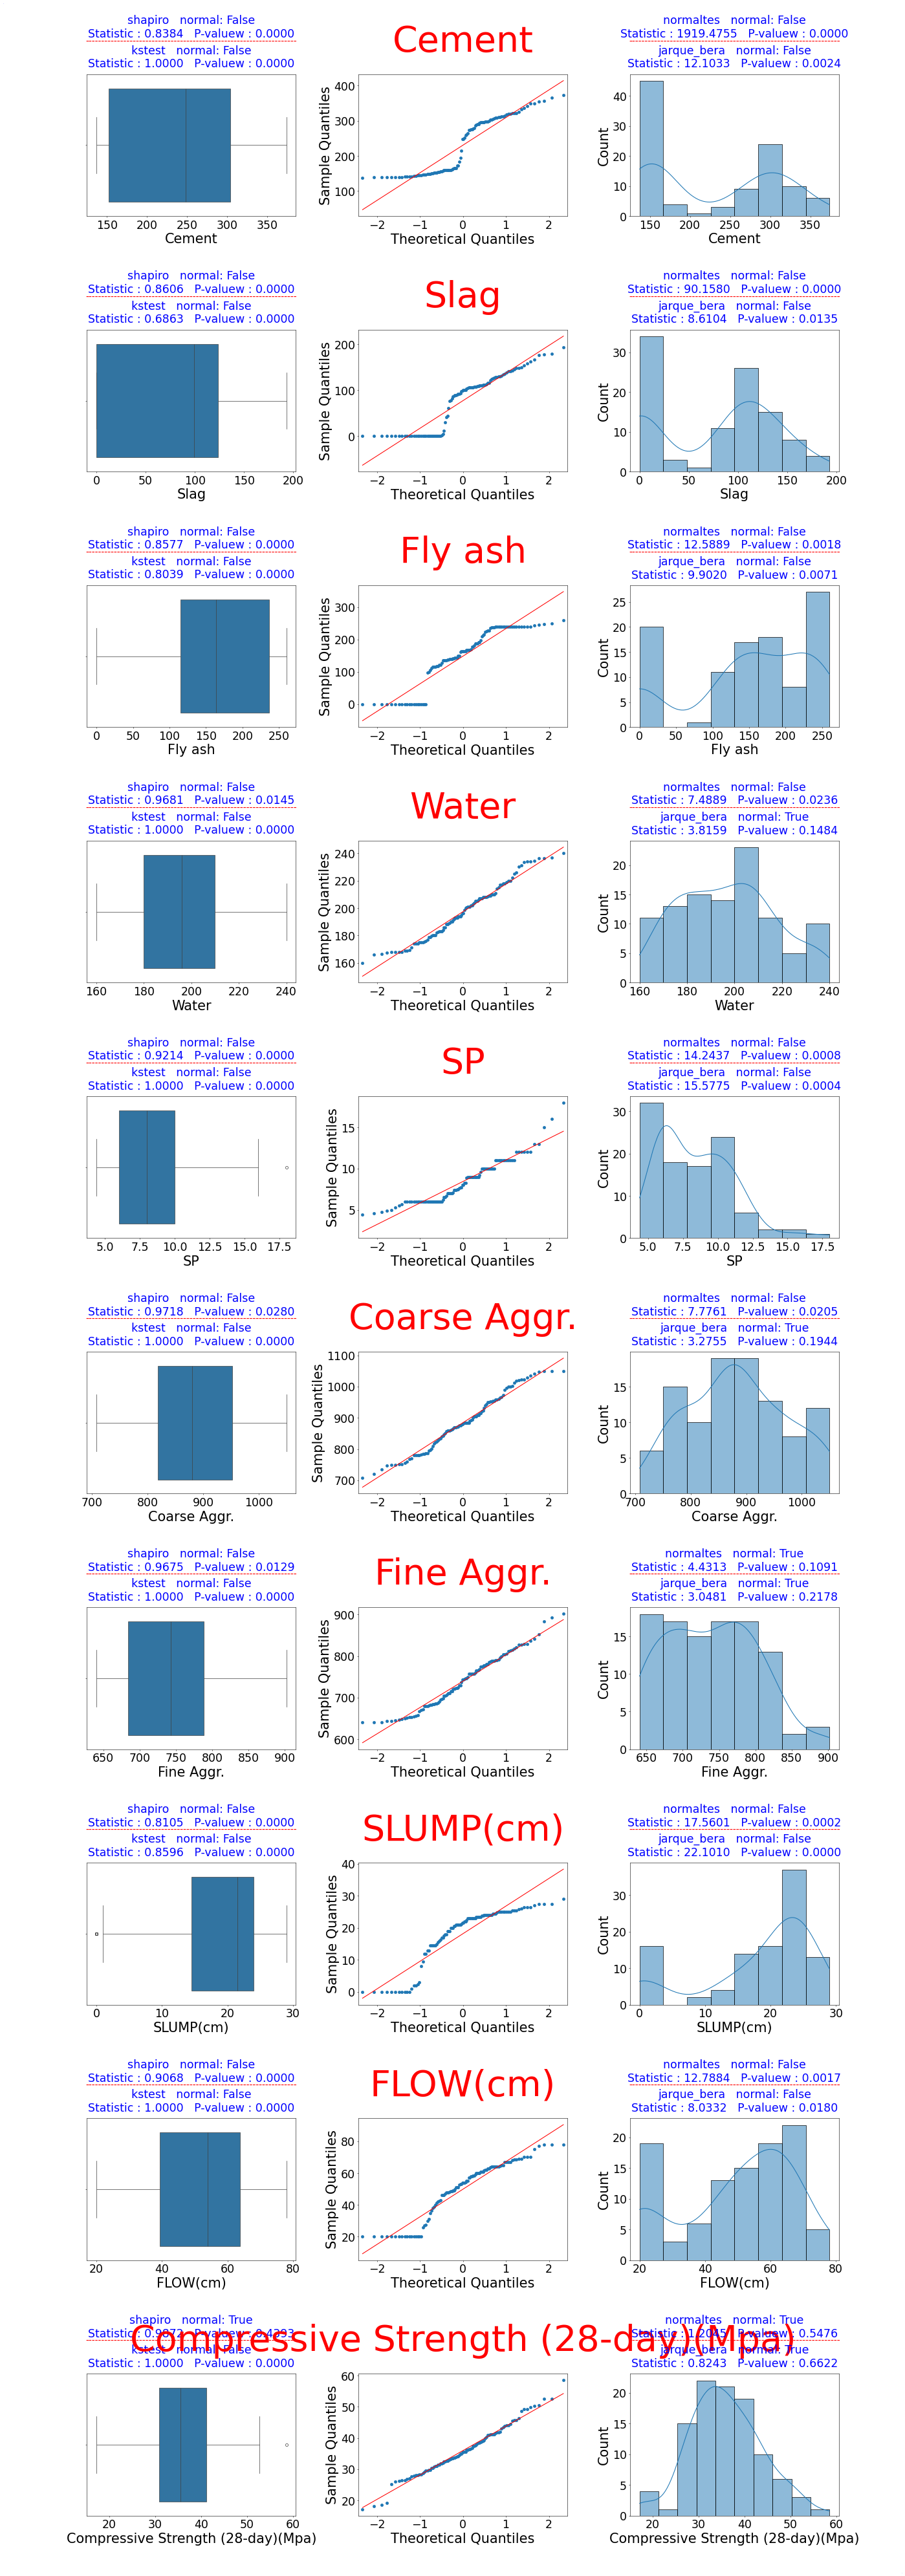

In [13]:
table, fig, axes,df_count,yang_dipakai=visual_norm(df_nums,True,0.05, 50)

In [14]:
table

,Columns,Shapiro,Stat_shapiro,P_value_shapiro,Normaltes,Stat_Normaltes,P_value_Normaltes,Kstest,Stat_Kstest,P_value_Kstest,Jarque_bera,Stat_Jarque_bera,P_value_Jarque_bera
0,Cement,False,0.8384,0.0000,False,1919.4755,0.0000,False,1.0000,0.0000,False,12.1033,0.0024
1,Slag,False,0.8606,0.0000,False,90.1580,0.0000,False,0.6863,0.0000,False,8.6104,0.0135
2,Fly ash,False,0.8577,0.0000,False,12.5889,0.0018,False,0.8039,0.0000,False,9.9020,0.0071
3,Water,False,0.9681,0.0145,False,7.4889,0.0236,False,1.0000,0.0000,True,3.8159,0.1484
4,SP,False,0.9214,0.0000,False,14.2437,0.0008,False,1.0000,0.0000,False,15.5775,0.0004
5,Coarse Aggr.,False,0.9718,0.0280,False,7.7761,0.0205,False,1.0000,0.0000,True,3.2755,0.1944
6,Fine Aggr.,False,0.9675,0.0129,True,4.4313,0.1091,False,1.0000,0.0000,True,3.0481,0.2178
7,SLUMP(cm),False,0.8105,0.0000,False,17.5601,0.0002,False,0.8596,0.0000,False,22.1010,0.0000
8,FLOW(cm),False,0.9068,0.0000,False,12.7884,0.0017,False,1.0000,0.0000,False,8.0332,0.0180
9,Compressive Strength (28-day)(Mpa),True,0.9872,0.4393,True,1.2045,0.5476,False,1.0000,0.0000,True,0.8243,0.6622


## correlation 



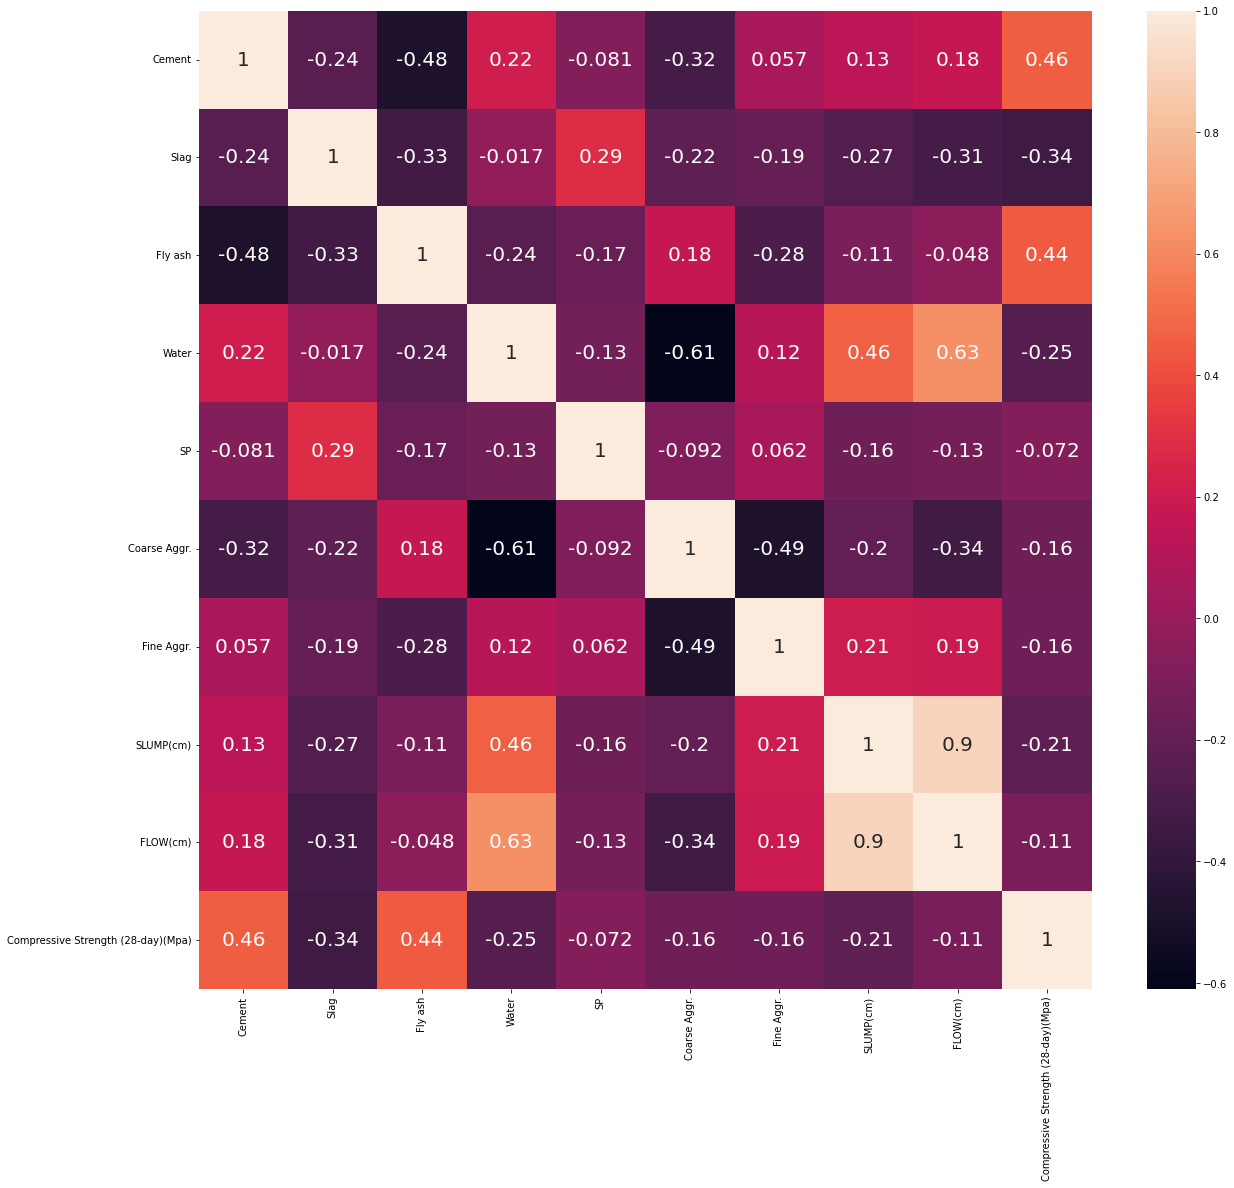

In [27]:
plt.figure(figsize=(20,18))
sns.heatmap(df_nums.corr(), annot=True, annot_kws={"size": 20}) 
plt.show()

In [35]:
cari_cor_tabrak(X,y,0.85)


Cement          0.450724
Slag            0.312849
Fly ash         0.296721
Water           0.155340
SP              0.220135
Coarse Aggr.    0.000000
Fine Aggr.      0.101552
SLUMP(cm)       0.157322
FLOW(cm)        0.115090
dtype: float64


,corelasi ant,adalah,kolom1,variansi1,cor1 y,kolom2,variansi2,cor2 y
0,FLOW(cm) <-> Slag,0.903574,FLOW(cm),300.832949,-0.11376,SLUMP(cm),74.335328,-0.214156


## Covariance ,Variansi dan corelasi antar data  


In [36]:
X=df.drop(columns='Compressive Strength (28-day)(Mpa)')
y=df['Compressive Strength (28-day)(Mpa)']

In [37]:
temp2=[]
target='Compressive Strength (28-day)(Mpa)'
for i in X.columns:

        temp=i

    
        temp2.append([temp,len(X[temp].unique()),ubah_notasi_ilmiah(X[temp].var()),ubah_notasi_ilmiah(np.cov(df[i],df[target])[0][1])])
datavar=pd.DataFrame(temp2,columns=['','data unik','var',f'cov - {target}'])
datavar

,,data unik,var,cov - Compressive Strength (28-day)(Mpa)
0,Cement,80,6237.1303,282.3199
1,Slag,63,3642.7431,-162.8745
2,Fly ash,57,7351.6936,297.9517
3,Water,70,409.1128,-39.5791
4,SP,31,6.8663,-1.4742
5,Coarse Aggr.,91,7869.2589,-109.5843
6,Fine Aggr.,89,4051.9293,-77.5564
7,SLUMP(cm),39,75.0713,-14.5707
8,FLOW(cm),50,303.8115,-15.5706


In [38]:
df=df.drop(columns=['Coarse Aggr.'])

In [39]:
df.to_csv("data/data_csv/data_bersih.csv",index=False)

In [40]:
table.to_csv("data/data_csv/data_dist.csv",index=False)